# Solving Equations

In [2]:
using Plots
using LaTeXStrings
using Revise
using LinearAlgebra
using DifferentialEquations
pyplot()
# Set default fonts for all plots
fnt = Plots.font("DejaVu Sans", 5.0)
default(titlefont=fnt, guidefont=fnt, tickfont=fnt, legendfont=fnt)

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


## 1. Root Finding in One Dimension

### 1.1 Bisection Method

Task: find $x$ such that $f(x) = 0$.

Interval $[a_0,b_0]$ brackets a root of $f(x)$ if $f(a_0)\,f(b_0) <0$.

Bracket and bisect method:

1 $c_n = \frac{1}{2}(a_n+b_n)$  
2 If $f(a_n)\,f(c_n) <0$, $[a_{n+1}, b_{n+1}] = [a_n, c_n]$. Otherwise  $[a_{n+1}, b_{n+1}] = [c_n, b_n]$  
3  Repeat until $\epsilon_n = b_n-a_n < \epsilon_\text{tol}$.

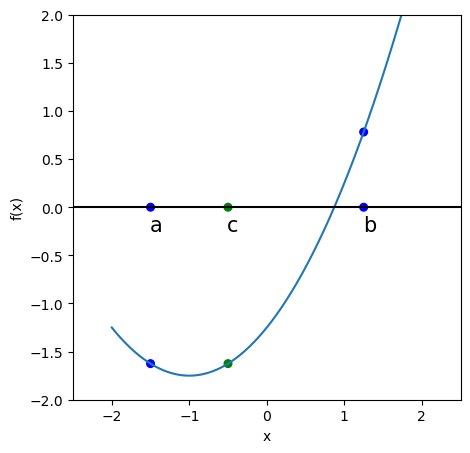

(PyPlot.Figure(PyObject <Figure size 500x500 with 1 Axes>), PyObject <AxesSubplot:xlabel='x', ylabel='f(x)'>)

In [4]:
include("files/code/figures.jl")
figures.plot_bracket_root()

Convergence: $\epsilon_n \sim 2^{-n}$.

### 1.2 Newtonn-Raphson Method

Suppose root is at $x=x^*$ and current estimate is $x_n$.

Write $x_{n+1} = x_n+\delta_n$ and try to choose $\delta_n$ such that
$f(x_{n+1}) = 0$:

Taylor expand:
$$
0 = f(x_{n+1}) = f(x_n + \delta_n) = f(x_n) + \delta_n\,f^\prime(x_n) + \mathcal{O}(\delta_n^2) 
$$
Assuming we are near the root, we neglect the $\mathcal{O}(\delta_n^2)$ terms and solve for $\delta_n$: 
$$
\delta_n = -\frac{f(x_n)}{f^\prime(x_n)}.
$$
This gives the Newton-Raphson iterative method:
$$
x_{n+1} = x_n  -\frac{f(x_n)}{f^\prime(x_n)}.
$$

#### 1.2.1 Convergence Properties of Newton-Raphson



Geometrical interpretation:

<img src="files/images/Newton-Raphson.jpg" alt="NR" style="width: 400px;"/>  

NR is not guaranteed to converge:



<img src="files/images/Newton-RaphsonFailure1.jpg" alt="NR" style="width: 400px;"/>  



<img src="files/images/Newton-RaphsonFailure2.jpg" alt="NR" style="width: 400px;"/>  

#### 1.2.2 Super-Exponential Convergence  of Newton-Raphson



When NR does converge, it converges super-exponentially.

Let  $\epsilon_n = x_n - x_*$.  Then NR formula gives:
$$
\epsilon_{n+1} = \epsilon_n - \frac{f(x^*+\epsilon_n)}{f^\prime(x^*+\epsilon_n)}.
$$
Taylor expanding and using $f(x^*)=0$ one obtains:

$$
\begin{align*}
f(x^*+\epsilon_n) &= f(x^*) + \frac{\epsilon_n}{1} \cdot f'(x^*) + \frac{\epsilon_n^2}{2} \cdot f''(x^*) + O(\epsilon_n^3) \\
& = \epsilon_n\ f^\prime(x^*) \cdot \left( 1+ \frac{\epsilon_n}{2}\frac{f^{\prime\prime}(x^*)}{f^\prime(x^*)} + O(\epsilon_n^2)\right),\\
f^\prime(x^*+\epsilon_n) &= f'(x^*) + \frac{\epsilon_n}{1} \cdot f''(x^*) + O(\epsilon_n^2) \\
& = f^\prime(x^*)\, \left( 1+ \epsilon_n \frac{f^{\prime\prime}(x^*)}{f^\prime(x^*)}  + O(\epsilon_n^2)\right).
\end{align*}
$$

$$
\begin{align*}
\frac{f(x^* + \epsilon_n)}{f'(x^* + \epsilon_n)} & = \frac{\epsilon_n\ f^\prime(x^*)  \left( 1+ \frac{\epsilon_n}{2}\frac{f^{\prime\prime}(x^*)}{f^\prime(x^*)} + O(\epsilon_n^2)\right)}{f^\prime(x^*)\, \left( 1+ \epsilon_n \frac{f^{\prime\prime}(x^*)}{f^\prime(x^*)}  + O(\epsilon_n^2)\right)} \\ 
& = \epsilon_n \cdot \frac{1+\frac{\epsilon_n}{2} \cdot \frac{f''(x^*)}{f'(x^*)} + O(\epsilon_n^2)}{1 + \epsilon_n \cdot \frac{f''(x^*)}{f'(x^*)} + O(\epsilon_n^2)} \\
& = \epsilon_n \cdot \left[ 1 - \frac{\frac{\epsilon_n}{2} \cdot \frac{f''(x^*)}{f'(x^*)} + O(\epsilon_n^2)}{1 + \epsilon_n \cdot \frac{f''(x^*)}{f'(x^*)} + O(\epsilon_n^2)}\right] \\
& = \epsilon_n \cdot \left(1 + \epsilon_n \cdot \frac{f''(x^*)}{2f'(x^*)} + O(\epsilon_n^2) \right).
\end{align*}
$$

Keeping only the leading order terms on the RHS, there is a cancellation at $\mathcal{O}(\epsilon_n)$ and we get
$$
 \epsilon_{n+1} = \alpha\,\epsilon _n^2.
$$
where $\alpha =  \frac{f^{\prime\prime}(x_*)}{2\,f^\prime(x_*)}$ depends on the properties of $f$ at the root, $x^*$.

This nonlinear recursion relation can be linearised by $a_n = \log_\alpha \epsilon_n$ to give:
$$
a_{n+1} = 2\,a_n+1
$$
Solution is $a_n = c_0\,2^{n-1}-1$ where $c_0$ is a constant.  
In original variables, choosing $c_0$ to match the initial condition, $\epsilon_0$, we get
$$
\epsilon_n = \epsilon_0\,\left|\alpha \right|^{-1}\,\left|\alpha \right|^{2^n}.
$$


## 2. Newton-Raphson in $\mathbb{R}^n$



System of $n$ equations in $\mathbb{R}^n$:
$$
\begin{align*}
F_1(x_1\ldots x_n) &= 0 \\
\vdots\hspace{1.0cm}  & \ \  \vdots\\
F_n(x_1\ldots x_n) &= 0. 
\end{align*}
$$
or 
$$
\mathbf{F}(\mathbf{x}) = 0.
$$

As before, write $\mathbf{x}_{n+1}=\mathbf{x}_n+\boldsymbol{\delta}_n$ and try to choose  $\boldsymbol{\delta}_n$  such that  $\mathbf{F}(\mathbf{x}_{n+1})=0$.

Taylor expand:

$$
\begin{align*}
0 &= \mathbf{F}(\mathbf{x}_{n+1}) = \mathbf{F}(\mathbf{x}_n + \boldsymbol{\delta}_n)\\
&= \mathbf{F}(\mathbf{x}_n) + \mathbf{J}(\mathbf{x}_n)\,\boldsymbol{\delta}_n + \mathcal{O}(\left|\boldsymbol{\delta}\right|_n^2),
\end{align*}
$$

where $\mathbf{J}(\mathbf{x}_n)$ is the Jacobian matrix

$$
\mathbf{J}_{i\,j} = \frac{\partial F_i}{\partial x_j}(\mathbf{x}_n).
$$

Neglecting the $\mathcal{O}(\left|\boldsymbol{\delta}_n\right|^2)$ terms, we  obtain $\boldsymbol{\delta}_n$ from a linear solve:

$$
\boldsymbol{\delta}_n = - \mathbf{J}(\mathbf{x}_n)\,\backslash  \, \mathbf{F}(\mathbf{x}_n)
$$


### 2.1 Example: Newton-Raphson Iteration in $\mathbb{C}$.



For complex valued functions of a complex variable:
$$
z_{n+1} = z_n - \frac{f(z_n)}{f^\prime(z_n)}
$$

Nonlinear iterated map which can lead to very rich dynamics (periodic cycles, chaos, intermittency etc). 

Example: compute basins of attraction in $\mathbb{C}$  of the roots of the polynomial
$$
f(z) = z^3-1 =0.
$$
under NR iteration.

<img src="files/images/newton-fractal.png" alt="NR" style="width: 400px;"/>  

## 3. Ordinary Differential Equations



For initial value problems, it is generally sufficient to develop algorithms to solve autonomous first order systems in $\mathbb{R}^n$: 
$$
\frac{d \mathbf{u}}{d t}=  \mathbf{F}(\mathbf{u}) \hspace{0.5cm}\text{with }\hspace{0.5cm} \mathbf{u}(0) = \mathbf{U}_0.
$$
For example, the second order non-autonomous equation,
$$
\frac{d^2 y}{d t^2} + 2 \nu \omega \frac{d y}{d t} + \omega^2 y = F(t),
$$
is equivalent to this 3-dimensional autonomous system:
$$
\frac{d }{d t} \left(
\begin{array}{c}
u^{(1)}\\ 
u^{(2)}\\ 
u^{(3)} 
\end{array}
\right)
= 
\left(
\begin{array}{c}
-2 \nu \omega u^{(1)} - \omega^2 u^{(2)} + F(u^{(3)})\\ 
u^{(1)}\\ 
1 
\end{array}
\right)
\hspace{0.5cm}\text{where }\hspace{0.5cm} \left(
\begin{array}{c}
u^{(1)}\\ 
u^{(2)}\\ 
u^{(3)} 
\end{array}
\right) = \left(
\begin{array}{c}
\frac{d y}{d t}\\ 
y\\ 
t 
\end{array}
\right).
$$

### 3.1 Discretization and Time Stepping



**Discretisation**: approximate continuous $\mathbf{u}(t)$ on $t\in [0,T]$ by
$\{\mathbf{u}_i\ :\ i=0\ldots N\}$. Here 

$$
\begin{align*}
\mathbf{u}_i &= \mathbf{u}(t_i)\\
t_i &=i\,h,
\end{align*}
$$

and the "time step" is

$$
h=\frac{T}{N}.
$$

If $h$ is "small" then

$$
\frac{d \mathbf{u}}{d t}=  \mathbf{F}(\mathbf{u}) \hspace{0.5cm}\text{with }\hspace{0.5cm} \mathbf{u}(0) = \mathbf{U}_0.
$$

can be hueristically approximated by

$$
\frac{\mathbf{u}_{i+1}-\mathbf{u}_i}{h} = \mathbf{F}(\mathbf{u}_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0.
$$

Re-arranging, we get the (**Forward Euler**) time-stepping algorithm

$$
\mathbf{u}_{i+1} = \mathbf{u}_i + h\,\mathbf{F}_i \hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0,
$$

where $\mathbf{F}_i$ means $\mathbf{F}(\mathbf{u}_i)$. 

### 3.2 Taylor's Theorem




If $f(x)$ is a real-valued function which is differentiable $n+1$ times on the interval $[x, x+h]$ then there exists a point, $\xi$, in $[x, x+h]$ such that
$$
f(x+h) = f(x) + \frac{1}{1!}\, h \, \frac{d f}{d x}(x) + \frac{1}{2!}\, h^2 \, \frac{d^2f}{d x^2}(x) + \ldots\\
+ \frac{1}{n!}\, h^n \, \frac{d^nf}{d x^n}(x) + h^{n+1} R_{n+1}(\xi)
$$
where
$$
R_{n+1}(\xi) = \frac{1}{(n+1)!} \, \frac{d^{n+1} f}{d x^{n+1}}(\xi).
$$
Useful for systematic analysis of discrete approximations to derivatives and ODEs.

### 3.3 Finite Difference Approximations of Derivatives



Approximate $f^\prime(x)$ by linear combinations of values of $f$ at nearby points.  
Taylor with $n=1$:
$$
f(x+h) = f(x) + h \, f^\prime(x) + \mathcal{O}(h^2).
$$
Using same discrete notation as before, rearrange to get:
$$
f^\prime(x_i) = \frac{f_{i+1} - f_i}{h} +\mathcal{O}(h). \hspace{1.0cm}\textbf{forward difference formula.}
$$
Could also have started from $f(x-h)$ to obtain:
$$
f^\prime(x_i) = \frac{f_{i} - f_{i-1}}{h} +\mathcal{O}(h). \hspace{1.0cm}\textbf{backwards difference formula.}
$$
In both cases, the approximation error is $\mathcal{O}(h)$.

### 3.4 Higher Order Finite Differences: Improving the Error



Improved accuracy can be obtained by linearly combining more points:

$$
\begin{align*}
f_{i+1} &= f_i + h\,f^\prime(x_i) +  \frac{1}{2}\, h^2 \, f^{\prime\prime}(x_i) + \mathcal{O}(h^3)\\
f_{i-1} &= f_i - h\,f^\prime(x_i) +  \frac{1}{2}\, h^2 \, f^{\prime\prime}(x_i) + \mathcal{O}(h^3).
\end{align*}
$$

Take the linear combination $a_1\,f_{i-1} +a_2\,f_i +a_3\,f_{i+1}$:

$$
a_1\,f_{i-1} +a_2\,f_i +a_3\,f_{i+1} = (a_1+a_2+a_3)\,f_i + (a_3-a_1)\,h\,f^\prime(x_i)\\
+ \frac{1}{2}\,(a_3+a_1)\, h^2 \, f^{\prime\prime}(x_i) + O(h^3).
$$
We want to choose the $a$'s to cancel the terms proportional to $h^0$ and $h^2$.

$a_1$, $a_2$ and $a_3$ should therefore satisfy the equations

$$
\begin{align*}
a_1+a_2+a_3 &=0\\
a_3-a_1 &= 1\\
a_3+a_1 &=0.
\end{align*}
$$

We get $a_1=-\frac{1}{2}$, $a_2=0$ and $a_3 = \frac{1}{2}$.

Rearranging to get an expression for $f^\prime(x_i)$:
$$
f^\prime(x_i) = \frac{f_{i+1} - f_{i-1}}{2\,h} + O(h^2).  \hspace{1.0cm}\textbf{centered difference formula.}
$$




The set of points underpinning a finite-difference approximation is known as the "stencil". 

A 5-point stencil leads to a 4th order accurate finite difference formula for $f^\prime(x_i)$:

$$
\frac{-f_{i+2}\!+\!8 f_{i+1}\! - \!8 f_{i-1}\!+\!f_{i-2}}{12\,h}\! +\! O(h^4).
$$


<img src="files/images/finiteDifferences.jpg" alt="FD" style="width: 400px;"/> 

Error as a function of $h$ for several finite difference approximations to the derivative of $f(x) = \sqrt{x}$ at $x=2$


### 3.5 Euler method again



Return to the ODE (assumed scalar from now on)
$$
\frac{d u}{d t}=  F(u) \hspace{0.5cm}\text{with }\hspace{0.5cm} u(0) = U_0.
$$
Accounting for the error in the forward difference approximation,

$$
\frac{u_{i+1}-u_i}{h} +\mathcal{O}(h) = F(u_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} u_0 = U_0.
$$

The Forward Euler time-stepping algorithm thus has **step-wise error** $\mathcal{O}(h^2)$:

$$
u_{i+1} = u_i + h\,F_i  +\mathcal{O}(h^2)\hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0,
$$

**Global error** is $\mathcal{O}(N h^2) = T\,\mathcal{O}(h)$ since $h=\frac{T}{N}$.


### 3.6 Implicit Methods: Backward Euler



We could equally have used the backward difference approximation:

$$
\frac{u_{i}-u_{i-1}}{h} +\mathcal{O}(h) = F(u_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} u_0 = U_0.
$$

which gives (with $i \to i+1$)

$$
u_{i+1} = u_i + h\, F_{i+1} + O(h^2).
$$

This is called the **Backward Euler Method**. Note $u_{i+1}$ appears on both sides. 

This is an example of an **implicit** method. Implicit methods require a Newton-Raphson solve at each timestep.


### 3.7 Improving Accuracy: Trapezoidal Method



Another way to think about time-stepping algorithms is via approximation of
$$
u(t+h) = u(t) + \int_t^{t+h} \!\!\!\!F(u(\tau))\,d\tau.
$$

Approximation of integral with left and right Riemann rule gives the forward and backward Euler methods respectively.

$\int_t^{t+h} F(u(\tau)) d\tau \approx h \cdot F(u(t))$ gives Forward Euler, and $\int_t^{t+h} F(u(\tau)) d\tau \approx h \cdot F(u(t+h))$ gives Backwarf Euler.


If we use the Trapezoidal rule we get:

$$
u_{i+1} = u_i + \frac{h}{2}\left[F_i + F_{i+1} \right].
$$
This is called the implicit trapezoidal method.

The implicit trapezoidal method improves on the Euler methods because it has a stepwise error of $\mathcal{O}(h^3)$. How to show this?

#### 3.7.1 Error Analysis of Trapezoidal Method



Consider Taylor expansion of $u_{i+1}$:
$$
u_{i+1} = u_i + h \frac{d u}{d t}(t_i) + \frac{h^2}{2}\frac{d^2 u}{d t^2}(t_i) + O(h^3)\\
= u_i + h F_i +\frac{1}{2} h^2 F_i\, F^\prime_i +  O(h^3)
$$
Note the use of the chain rule:
$$
\frac{d^2 u}{d t^2}(t_i) = \left.\frac{d }{d t}F(u(t))\right|_{t=t_i} = \left. F^\prime(u(t))\,\frac{d u}{d t}\right|_{t=t_i}\\
= \left. F^\prime(u(t))\,F(u(t))\right|_{t=t_i} = F^\prime_i\,F_i.
$$

Idea: Taylor expand RHS of timestepping rule and identify the first order at which expansion differs from the above.

$$
\begin{align*}
F(u(t_{i+1})) &= F(u_i + h F_i + \mathcal{O}(h^2))\\
&= F(u_i) + (h F_i) \frac{d F}{d u}(u(t_i)) + O(h^2)\\
&=F_i + h F_i F_i^\prime + O(h^2).
\end{align*}
$$
RHS of implicit trapezoidal method is therefore
$$
u_i + \frac{h}{2}\left[F_i + F_{i+1}\right] =  u_i + h F_i +\frac{1}{2} h^2 F_i\, F^\prime_i +  \mathcal{O}(h^3)
$$
Comparing with $u_{i+1}$, stepwise error is $\mathcal{O}(h^3)$.

### 3.8 Predictor-Corrector Methods



Can we get higher order accuracy with an explicit scheme?

**Predictor-corrector** idea: use a less accurate explicit method to predict $u_{i+1}$ and then use the higher order formula to correct this prediction.

Example: improved Euler method:

1. Use forward Euler as predictor:
$$
u^*_{i+1} = u_i + h F_i,
$$
and calculate
$$
F^*_{i+1} = F(u^*_{i+1}).
$$
2. Use the Trapezoidal Method to correct this :
$$
u_{i+1} = u_i + \frac{h}{2}\left[F_i + F^*_{i+1} \right].
$$

*Error analysis shows stepwise error is $\mathcal{O}(h^3)$.*

Proof: 
$$
\begin{align*}
u_{i+1} - u_i - \frac{h}{2} \cdot [F_i + F_{i+1}^*] = & u(t_{i+1}) - u(t_i) - \frac{h}{2} \cdot [F(u(t_i)) + F(u(t_i) + h F(u(t_i)))] \\
= & u(t_i + h) - u(t_i) -\frac{h}{2} \cdot [F(u(t_i)) + F(u(t_i) + h F(u(t_i)))] \\
= & [u(t_i) + h u'(t_i) + \frac{h^2}{2} u''(t_i) + O(h^3)] - u(t_i) - \\
 & \frac{h}{2} \cdot \{ F(u(t_i)) + [F(u(t_i)) + hF(u(t_i)) F'(u(t_i)) + O(h^2)] \} \\ 
 = & [u(t_i) + h F(u(t_i)) + \frac{h^2}{2} F'(u(t_i)) F(u(t_i)) + O(h^3)] - u(t_i) - \\
 & \frac{h}{2} \cdot \{ F(u(t_i)) + [F(u(t_i)) + hF(u(t_i)) F'(u(t_i)) + O(h^2)] \} \\
 = & O(h^3)
\end{align*}
$$

### 3.9 Choosing the Timestep



In practice we need to operate at a finite value of $h$. How do we choose it? 

Measure the error by comparing the numerical solution at a grid point, $\widetilde{u}_i$, to the exact solution, $u(t_i)$. 

Two tolerance criteria are commonly used:
$$
\begin{align*}
&E_a(h) = \left| \widetilde{u}_i - u_i \right| \leq \epsilon &  \text{Absolute error threshold,}\\
&E_r(h) = \frac{\left| \widetilde{u}_i - u_i \right|}{\left| u_i\right|} \leq \epsilon &  \text{Relative error threshold.}
\end{align*}
$$
Fixing error tolerance allows us to take larger timesteps when the solution is varying slowly.

#### 3.9.1 Adaptive Timestepping : Estimating Error



Problem: exact solution usually not known. Use trial steps:

1. Take a trial step with stepsize $h$ from $u_i$ to get estimate $u^{\rm B}_{i+1}$. 
2. Take 2 trial steps with stepsize $\frac{h}{2}$ from $u_i$ to get estimate $u^{\rm S}_{i+1}$. 
3. Estimate of local error is
$$
\Delta = \left|u^{\rm B}_{i+1} - u^{\rm S}_{i+1} \right|.
$$



#### 3.9.2 Adaptive Timestepping: Selecting the New Stepsize



If timestepping method is $n^{th}$ order, we know there is a constant $c$ such that

$$
c\, h_{\text{old}}^n = \Delta.
$$

For maximum efficiency, we should choose $h_{\text{new}}$ to saturate the error threshold:

$$
c\,h_{\text{new}}^n  = \epsilon.
$$

Eliminating $c$ between these two equations gives:

$$
h_{\text{new}} = \left(\frac{\epsilon}{\Delta}\right)^\frac{1}{n}h_{\text{old}}
$$

### 3.10 Stiff problems



With adaptive stepsizing we expect to take larger timesteps when the solution is varying slowly and smaller timesteps when the solution is varying rapidly.

**Sometimes explicit methods result in very small step sizes even when the solution is varying slowly. Such problems are said to be stiff**.

Efficient solution of stiff problems requires bespoke stiff solvers that are usually implicit.





Computational stiffness is a complicated topic: depends on the equation, the initial condition, the numerical method being used and the interval of integration. See [this article](http://www.scholarpedia.org/article/Stiff_systems).

Common feature is that the solution is varying slowly but "nearby" solutions vary rapidly.

The simple equation 

$$
\frac{d u }{d t} = -\lambda\, u \hspace{0.5cm} \text{with }u(0) = 1,
$$

turns out to have this property when $\lambda \gg 1$ or solution interval is long.

## 4. Solving ODEs in Julia



[DifferentialEquations.jl](https://docs.juliadiffeq.org/stable/) is a well developed system for solving systems of differential equations. In its basic form, it is very simple to use. 

Let's solve the *relaxation oscillator* equations:
$$
\begin{align*}
\frac{d x}{d t} &= \mu( y -(\frac{1}{3} x^3 - x))\\
\frac{d y}{d t} &= -\frac{1}{\mu}x.
\end{align*}
$$



**Steps**:

1. Define the RHS of the system of equations.
2. Define an ```ODEProblem``` object.
3. Integrate the ```ODEProblem```.
4. Plot and analyse the solution.

### Step 1: Define the RHS 



* ```du``` is the right hand side of the system (as a vector)
* ```u``` are the dependent variables for (as a vector)
* ```t``` is the time variable (for non-autonomous systems)
* ```p``` is a list of parameters that need to be passed in

In [5]:
using DifferentialEquations

function rel_osc!(du,u,p,t)
    x,y = u
    μ = p[1]
    du[1] = μ *(y - ((x^3.0)/3.0 - x ))
    du[2] = - x / μ
end

rel_osc! (generic function with 1 method)

### Step 2: Define the Problem


* specify initial condition, ```u0```.
* specify solution interval, ```tspan```
* provide values for the parameters, ```p```
* create an ```ODEProblem``` object. Takes ```u0```, ```tspan```, ```p``` and the RHS function from step 1 as arguments.

In [6]:
u0 = [-0.1,-0.1]
tspan = (0.0,25.0)
p = [1.0]
prob = ODEProblem(rel_osc!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 25.0)
u0: [-0.1, -0.1]

### Step 3: Integrate the Equations


In [8]:
sol=solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 53-element Array{Float64,1}:
  0.0
  0.09145051250313663
  0.31375450889603507
  0.6010932493697769
  0.9258077125963625
  1.3358990905985302
  1.859136183968317
  2.4173888480363694
  3.0158683466370477
  3.664269044897806
  4.313308032049602
  4.981826684600039
  5.705263784525903
  ⋮
 20.16434710416285
 20.586204287015974
 20.97913832847751
 21.396411144140433
 21.959213865321267
 22.509942475022964
 23.067289772094828
 23.481321890930737
 23.91974436753072
 24.328822836404225
 24.75078835122298
 25.0
u: 53-element Array{Array{Float64,1},1}:
 [-0.1, -0.1]
 [-0.1186531999110431, -0.09000790901327195]
 [-0.1667839883593314, -0.058344936365905556]
 [-0.23228332829387688, -0.0010502728595811514]
 [-0.30423296920762377, 0.08623643659295609]
 [-0.3760612867629594, 0.22680687043439485]
 [-0.40019675748993805, 0.43415848944671503]
 [-0.29077220028517115, 0.6347390347933562]
 [0.03888491034505014, 0.7223756297244842]


### Step 4: Plot the Solution

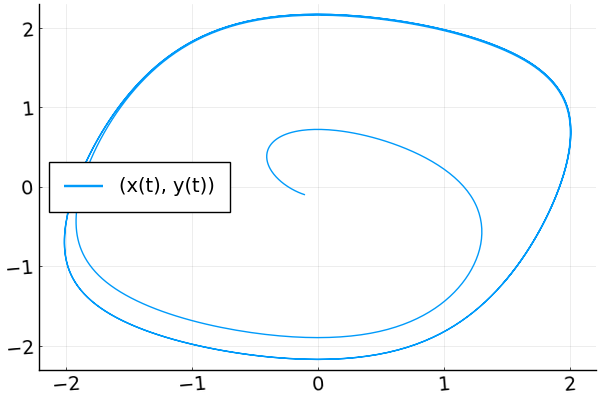

In [9]:
plot(sol,vars=(1,2), label="(x(t), y(t))")

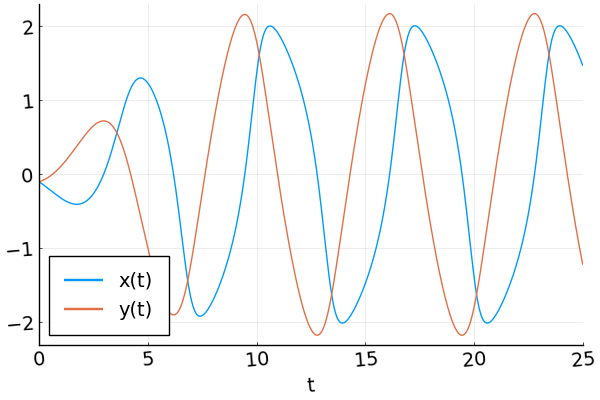

In [10]:
plot(sol, vars=(0,1), label="x(t)")
plot!(sol,vars=(0,2), label="y(t)")

### 4.1 Comparison of Forward and Backward Euler for Decay Equation

In [11]:
function exp_decay(u,p,t)
    λ = p[1]
    return -λ*u
end

u0 = 100.0; λ = 10.0;T=20.0/λ
h = 0.15
tspan = (0.0,T)
p = [λ]
prob = ODEProblem(exp_decay,u0,tspan,p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 2.0)
u0: 100.0

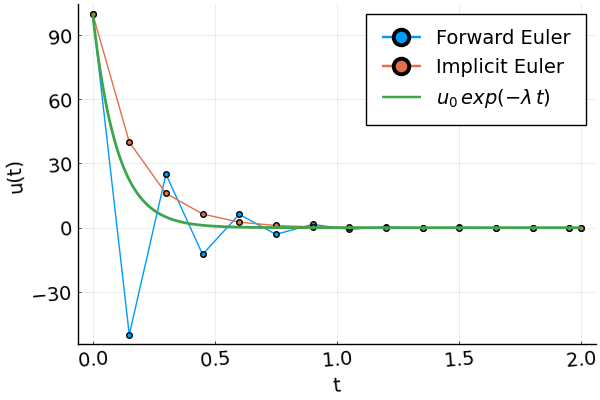

In [12]:
include("files/code/figures.jl")
sol1  = solve(prob, Euler(), dt=h)
sol2  = solve(prob, ImplicitEuler(), dt=h, adaptive=false)
figures.plot_Euler(sol1, sol2, λ, u0)

### 3.2 Two Timescales in Relaxation Oscillator

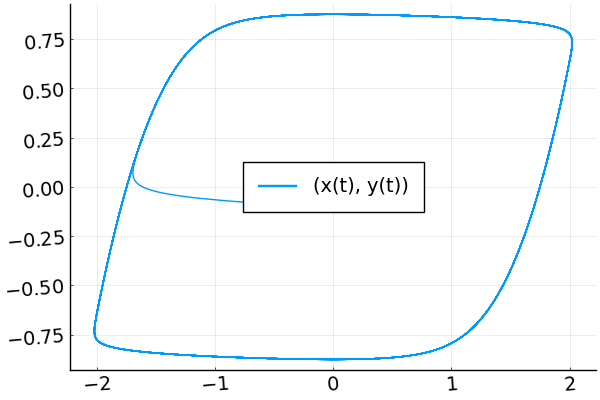

In [13]:
# Try changing μ
μ = 5.0
p1, p2 = figures.plot_relaxation_oscillator(μ);
p1

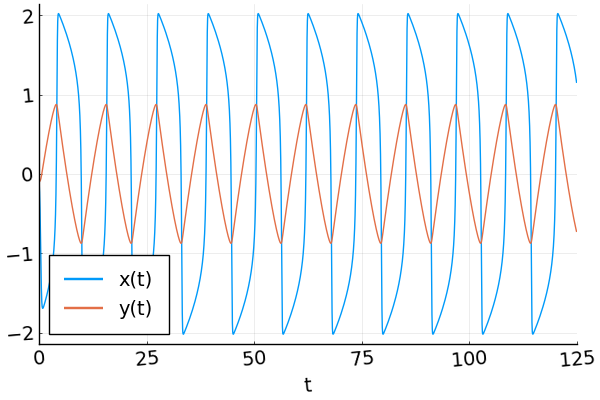

In [14]:
p2